In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../../database/automobile.csv')
print(f'the head of the data is\n{data.head()}\n the shape of the data is:{data.shape}')


the head of the data is
    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         m

In [ ]:
print(data.describe())


        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [ ]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    symboling         205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# For this dataset 
we are going to require more about the cars by itself, therefore, it is required to acquire the data that we don't know. But first. it'll be useful to check where are the nans.
At the moment that we know where's the data, therefore it'll be useful to check it out y subjoints of cars, would it be interesting to check by models or ome categorical
It'll be important to check each type of data. May be we are going to require to translate the values of the car to check some plots. And also it' ll be important to look out the categorical variables.
Also, it is important some histogramas of all of the type of data, at least with the categorical

In [31]:
data.replace('?', np.nan, inplace=True)
print(data)

      symboling  normalized-losses         make fuel-type aspiration  \
0             3              115.0  alfa-romero       gas        std   
1             3              115.0  alfa-romero       gas        std   
2             1              115.0  alfa-romero       gas        std   
3             2              164.0         audi       gas        std   
4             2              164.0         audi       gas        std   
..          ...                ...          ...       ...        ...   
200          -1               95.0        volvo       gas        std   
201          -1               95.0        volvo       gas      turbo   
202          -1               95.0        volvo       gas        std   
203          -1               95.0        volvo    diesel      turbo   
204          -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           fro

We've cleand some data and changed the type of the variable to our convenience. Now, let's check i fwe have duplicated

In [32]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['highway-mpg']=data['highway-mpg'].astype(float)
data['price     ']=data['price     '].astype(float)

In [33]:

conteo_filas_duplicadas = data.duplicated().sum()
print(conteo_filas_duplicadas)
#print(duplicated)
print(data.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    symboling         205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 n

Let's check a correlation map


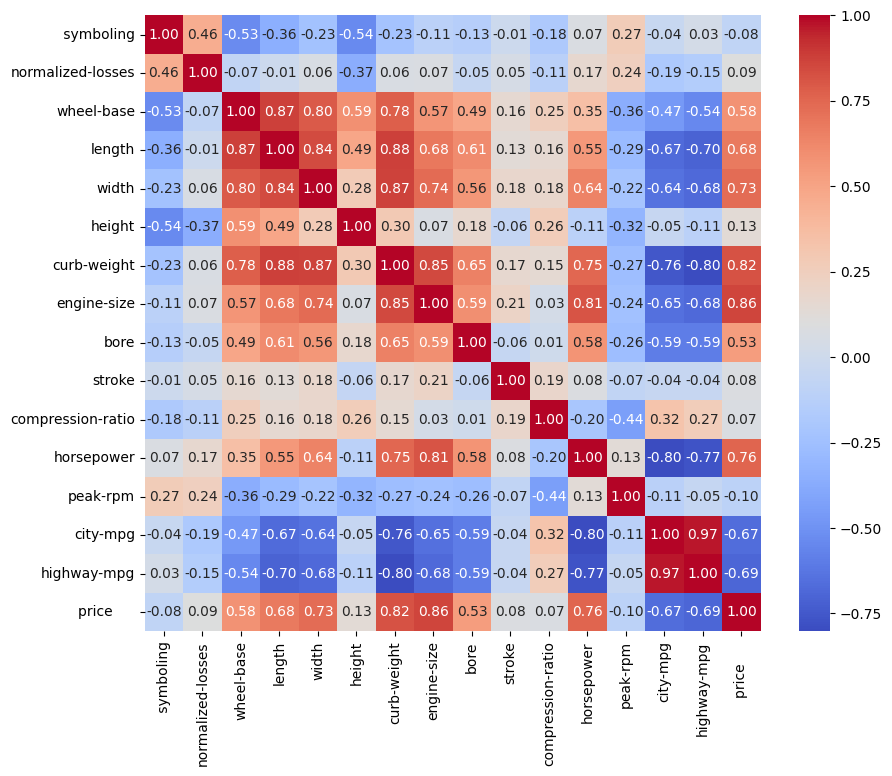

In [34]:
df_numerico = data.select_dtypes(include=[int, float]) #with just numerical data
matriz_correlacion = df_numerico.corr()
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Mostrar el gráfico
plt.show()

# Other step to check, it'll be useful to see how the plots are working on

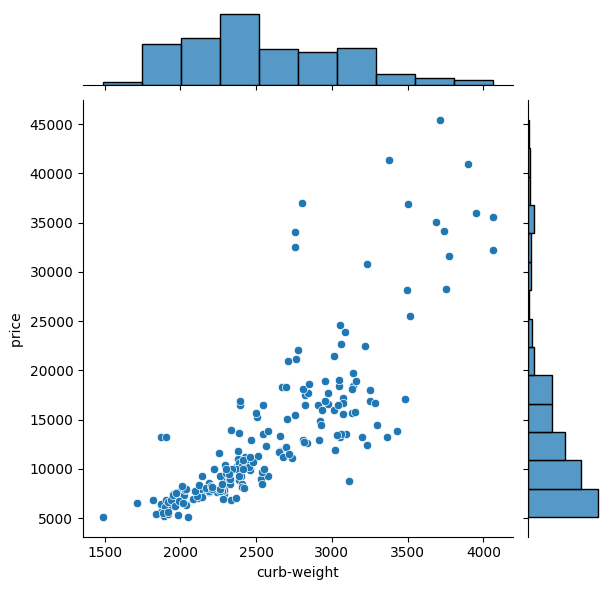

In [35]:
sns.jointplot(x='curb-weight', y='price     ', data=data)

Let's make some exploratory data withsome plots and skewness


In [36]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.165854,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.529733,479.334560,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Treatment for symboling
Let's check the lack of data on eac column to maake able the analysis

In [37]:
data[data[' symboling'].isnull()]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


There were no lack of data in the column symboling

In [38]:
data[data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


skew=  0.9761135438633949
mean= 120.6
median= 115.0


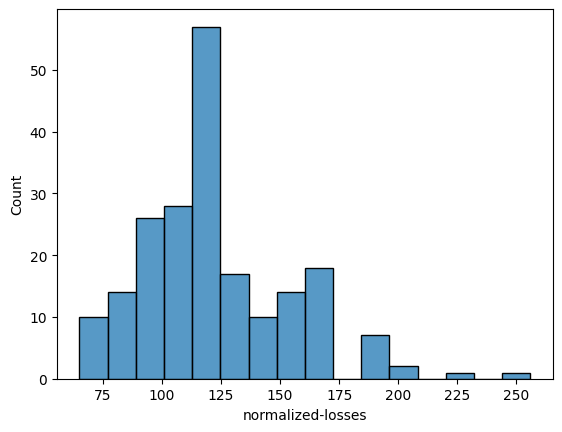

In [39]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

data['normalized-losses']=data['normalized-losses'].replace(np.nan,data['normalized-losses'].median())

skew=  0.9761135438633949
mean= 120.6
median= 115.0


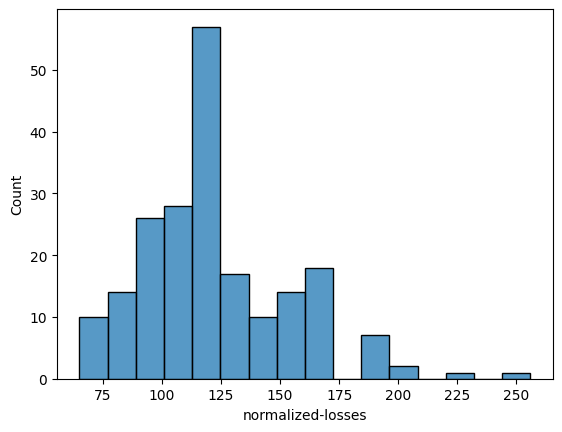

In [40]:
sns.histplot(data,x=data['normalized-losses'])
print('skew= ',data['normalized-losses'].skew())
print('mean=',data['normalized-losses'].mean())
print('median=',data['normalized-losses'].median())

|parameter\value|before|median|150|
|-------|----|----|---|
|skew|0.7659764175950632| 0.9761135438633949|0.3236915397985183|
|mean|122.0|120.6|127.6|
|median|115.0|115.0|128.0|

# Let's check the next columns
However it'll be useful to check by now what happens when we use those columns that have a stronger correlation among the price, so let's check it
* highway-mpg data complete 
* city-mpg data complete yes
* horsepower 2 values missing yes
* engine-size 0 values missing yes
* curb weight 0 values missing yes 
* width  0 values missing
* length  0 values missing
* price 0 values missing 

In [41]:
data[data['price     '].isnull()]
data['price     ']=data['price     '].replace(np.nan,data['price     '].mean())
print("skew",data['price     '].skew())


skew 1.8273241596359218


In [42]:
print(data['price     '].describe())
print("skew",data['price     '].skew())


count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price     , dtype: float64
skew 1.8273241596359218


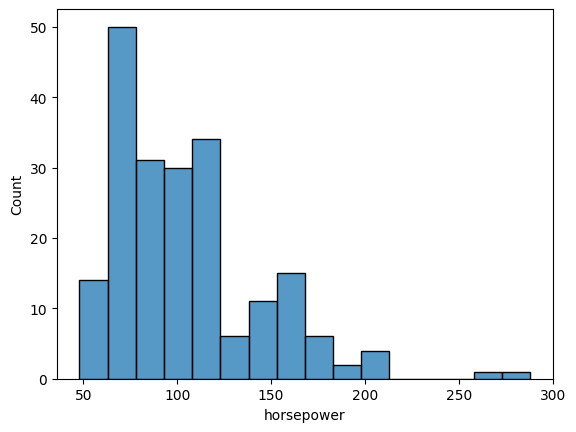

In [43]:
sns.histplot(data,x=data['horsepower'])
data['horsepower']=data['horsepower'].replace(np.nan,data['horsepower'].median())

In [44]:
data[data['horsepower'].isnull()]
data['horsepower'].describe()

count    205.000000
mean     104.165854
std       39.529733
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

# Let's try the CV 5x2 into our problem just to check, what happens if we are making the regression

# Engine size


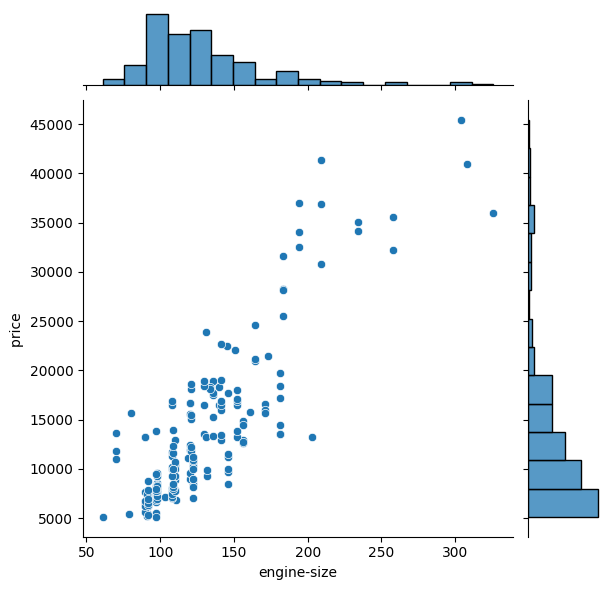

In [45]:
sns.jointplot(x=data['engine-size'], y=data['price     '])

Estadístico W: 0.8294385626444791
p-valor: 3.056836326510724e-14
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
Estadístico W: nan
p-valor: nan
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.
                price  engine-size
price        1.000000     0.861752
engine-size  0.861752     1.000000


<Axes: >

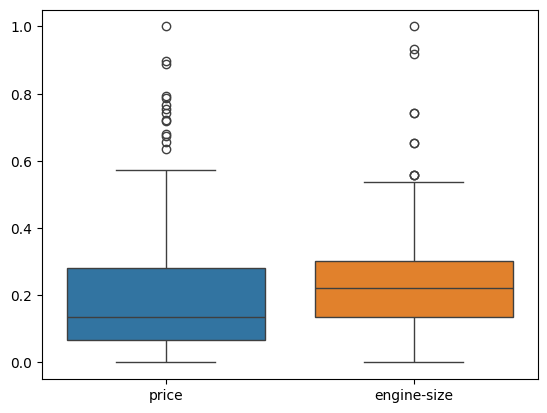

In [46]:
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
stat,p_value=stats.shapiro(data['engine-size'])
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

stat,p_value=stats.shapiro(data)
print(f'Estadístico W: {stat}')
print(f'p-valor: {p_value}')
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")
dfT1=pd.DataFrame({
    'price':data['price     '],
    'engine-size':data['engine-size']
})
scaler = MinMaxScaler()
dfT1[['price', 'engine-size']] = scaler.fit_transform(dfT1[['price', 'engine-size']])
print(dfT1.corr())


sns.boxplot(dfT1)


                price  engine-size
price        1.000000     0.692245
engine-size  0.692245     1.000000


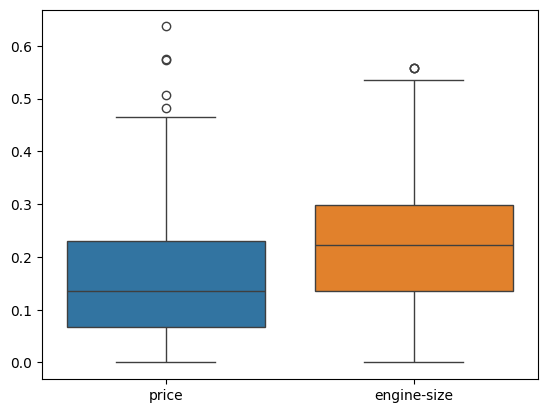

In [47]:
Q1p = dfT1['price'].quantile(0.10)
Q3p = dfT1['price'].quantile(0.75)
IQRp = Q3p - Q1p
Q1e = dfT1['engine-size'].quantile(0.10)
Q3e = dfT1['engine-size'].quantile(0.75)
IQRe = Q3e - Q1e
mean_price = dfT1['price'].mean()
dfT1['price'] = np.where(
    (dfT1['price'] < (Q1p - 1.5 * IQRp)) | (dfT1['price'] > (Q3p + 1.5 * IQRp)),
    mean_price,
    dfT1['price']
)

# Reemplazar outliers en 'engine-size' con la media
mean_engine_size = dfT1['engine-size'].mean()
dfT1['engine-size'] = np.where(
    (dfT1['engine-size'] < (Q1e - 1.5 * IQRe)) | (dfT1['engine-size'] > (Q3e + 1.5 * IQRe)),
    mean_engine_size,
    dfT1['engine-size'])
sns.boxplot(dfT1)

print(dfT1.corr())


# Normalize
Due to are differente magintuds, let's normalize them


Mean R^2: 0.7362087367142167
MSE:  16108000.544222165
Slope: [[158.4106251]]
Intercept: [-7137.29125762]


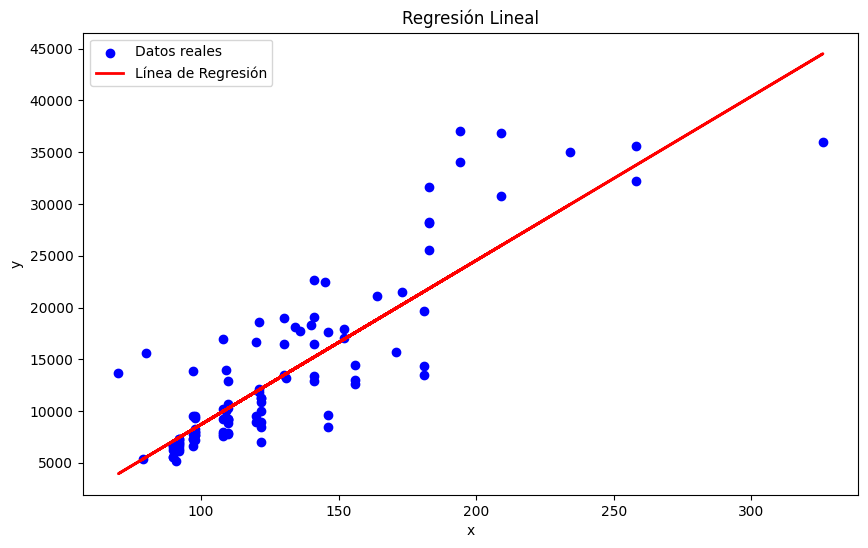

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
model = LinearRegression() 
mse_scores = []
r2_scores = []
X=(dfT1['engine-size']).to_frame()
Y=(dfT1['price']).to_frame()

X=(data['engine-size']).to_frame()
Y=(data['price     ']).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

                price  engine-size
price        1.000000     0.861752
engine-size  0.861752     1.000000


<Axes: >

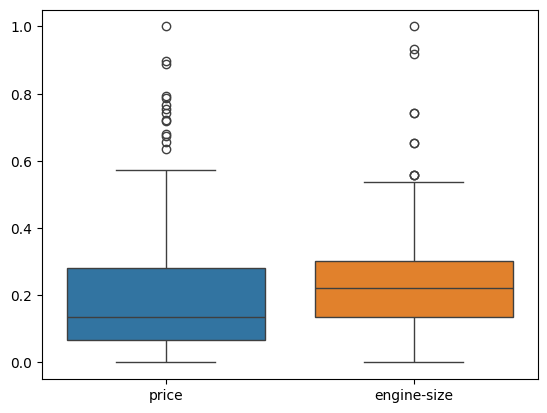

In [49]:
dfT1=pd.DataFrame({
    'price':data['price     '],
    'engine-size':data['engine-size']
})
#dfT1['price']=np.log(dfT1['price']+1)
#dfT1['engine-size']=np.log(dfT1['engine-size']+1)
scaler=MinMaxScaler()
dfT1[['price', 'engine-size']] = scaler.fit_transform(dfT1[['price', 'engine-size']])
print(dfT1.corr())

sns.boxplot(dfT1)


Mean R^2: 0.7362087367142168
MSE:  0.00992703573774292
RMSE:  0.00992703573774292
Slope: [[1.04212342]]
Intercept: [-0.06435239]


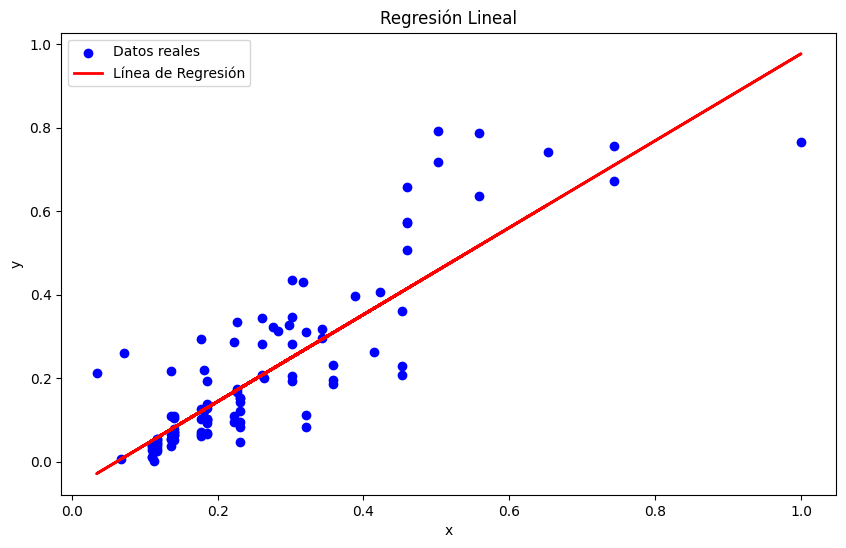

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score ,root_mean_squared_error#metrics that have been studied
model = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=(dfT1['engine-size']).to_frame()
Y=(dfT1['price']).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## knn engine size



Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Mejor puntuación (MSE negativo): -0.008260694761950247
Mean R^2: 0.7814960577066459
Mean MSE: 0.008260694761950247
Mean RMSE: 0.09078358735816178


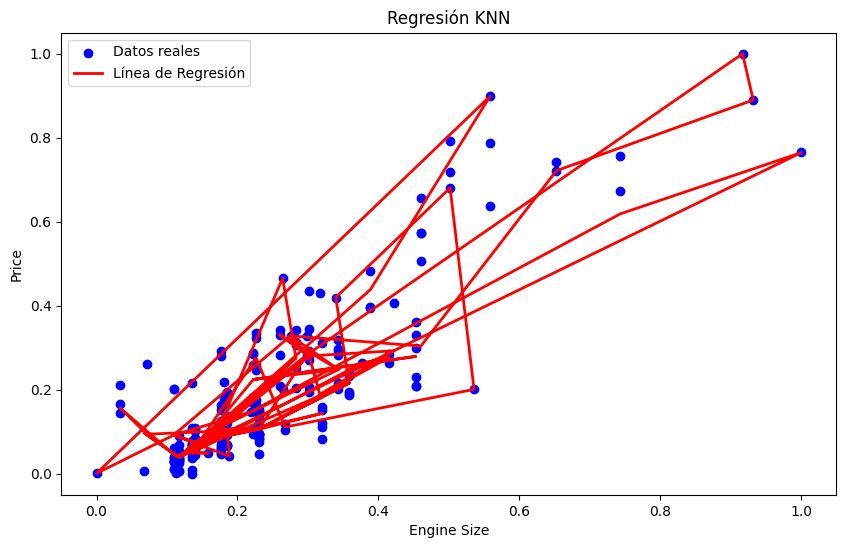

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y
X = dfT1['engine-size'].to_frame()
Y = dfT1['price'].to_frame()

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, best_model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# INtervalos 

Mean R^2: 0.7362087367142169
Mean MSE: 0.00992703573774292
Mean RMSE: 0.09960553714701531
Slope: 1.0421234211972827
Intercept: -0.06435239378003343
Intervalos de confianza del 95% para los parámetros:
                    0        1
const       -0.100095 -0.02861
engine-size  0.916737  1.16751
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     271.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.10e-30
Time:                        07:56:45   Log-Likelihood:                 94.975
No. Observations:                 103   AIC:                            -185.9
Df Residuals:                     101   BIC:                            -180.7
Df Model:                           1                   

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\25964824.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\25964824.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


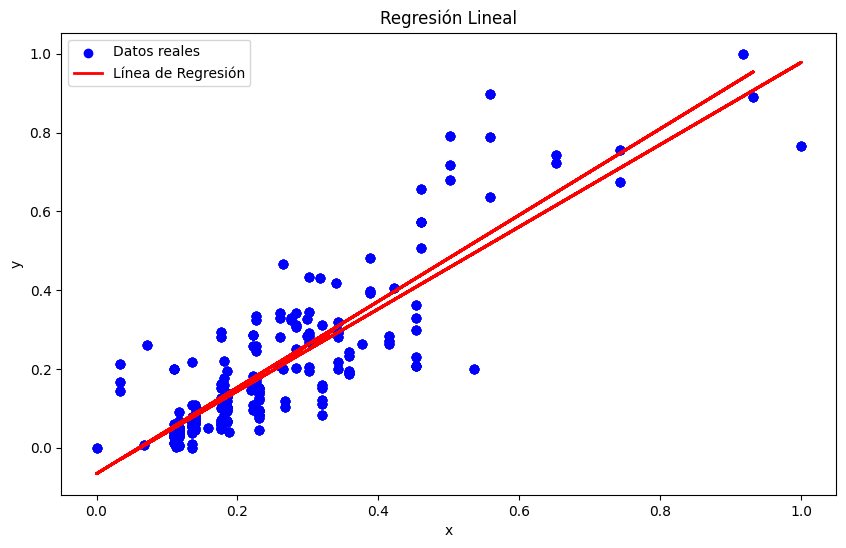

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = dfT1['engine-size'].to_frame()
Y = dfT1['price'].to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# MPG


Correlation           city-mpg     price
city-mpg  1.000000 -0.667449
price    -0.667449  1.000000
Skew city-mpg    0.663704
price       1.827324
dtype: float64


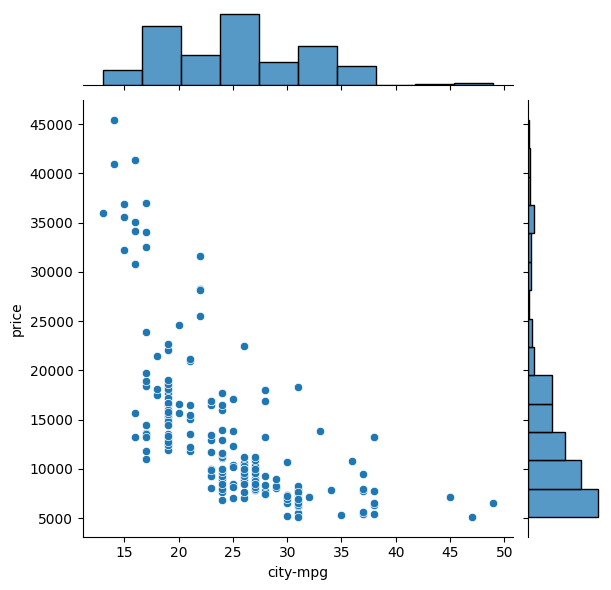

In [53]:
dfT2=pd.DataFrame({
    'city-mpg':data['city-mpg'],
    'price':data['price     ']
})
print("Correlation",dfT2.corr())
print("Skew",dfT2.skew())

sns.jointplot(x=dfT2['city-mpg'],y=dfT2.price)

Correlation
           city-mpg     price
city-mpg  1.000000 -0.791234
price    -0.791234  1.000000
Skew city-mpg    0.026578
price       0.667808
dtype: float64


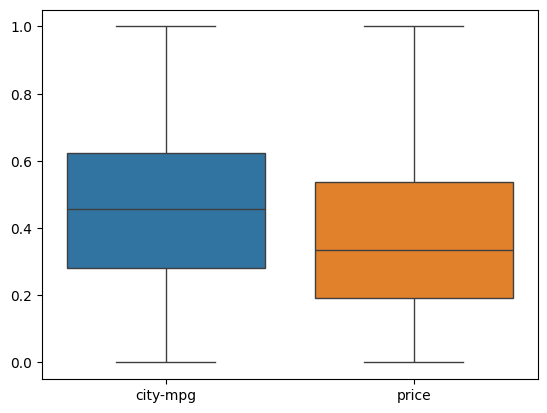

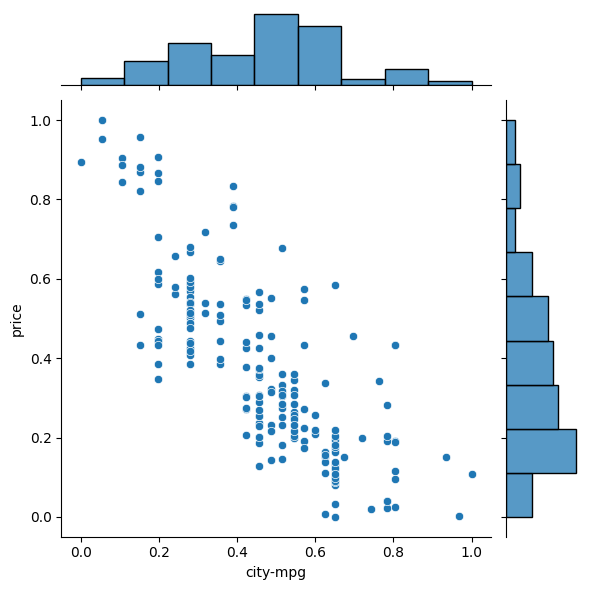

In [54]:
dfT2['city-mpg']=np.log(dfT2['city-mpg']+1)
dfT2['price']=np.log(dfT2['price']+1)

scaler=MinMaxScaler()
dfT2[['city-mpg','price']] = scaler.fit_transform(dfT2[['city-mpg','price']])
print("Correlation\n",dfT2.corr())
print("Skew",dfT2.skew())
sns.boxplot(dfT2)
sns.jointplot(x=dfT2['city-mpg'],y=dfT2.price)

Mean R^2: 0.6045640689950125
MSE:  0.020279279592056144
RMSE:  0.020279279592056144
Slope: [[-0.84773538]]
Intercept: [0.7644927]


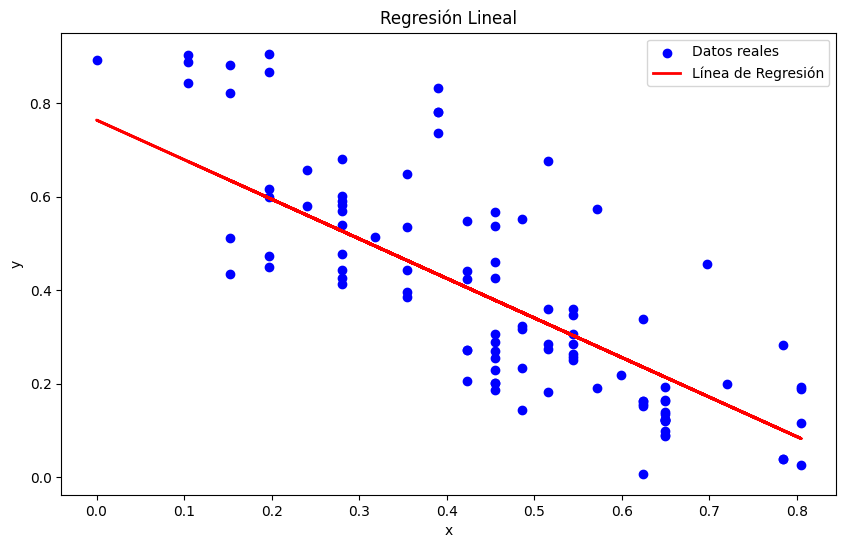

In [65]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=dfT2['city-mpg'].to_frame()
Y=dfT2['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model1.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model1.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model1.coef_)
print("Intercept:", model1.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.6552132651231009
MSE:  0.018119274594750746
RMSE:  0.018119274594750746
Slope: [[-0.84773538]]
Intercept: [0.7644927]


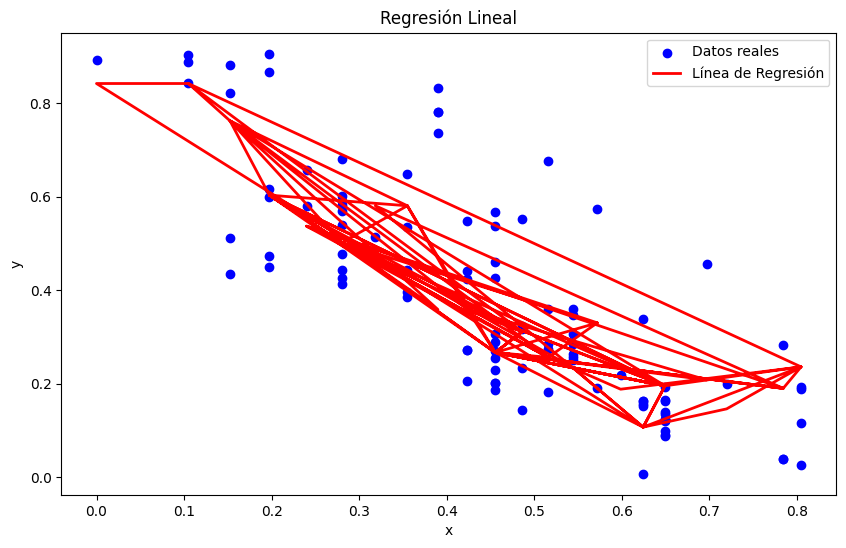

In [67]:
model1 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=dfT2['city-mpg'].to_frame()
Y=dfT2['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model1.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model1.coef_)
print("Intercept:", model1.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## intervals

Mean R^2: 0.6045640689950125
Mean MSE: 0.020279279592056148
Mean RMSE: 0.14237431771458053
Slope: -0.847735376275263
Intercept: 0.7644927023165945
Intervalos de confianza del 95% para los parámetros:
                 0         1
const     0.695085  0.833901
city-mpg -0.981473 -0.713998
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     158.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.19e-22
Time:                        10:41:44   Log-Likelihood:                 60.302
No. Observations:                 103   AIC:                            -116.6
Df Residuals:                     101   BIC:                            -111.3
Df Model:                           1                          

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\1819021391.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\1819021391.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


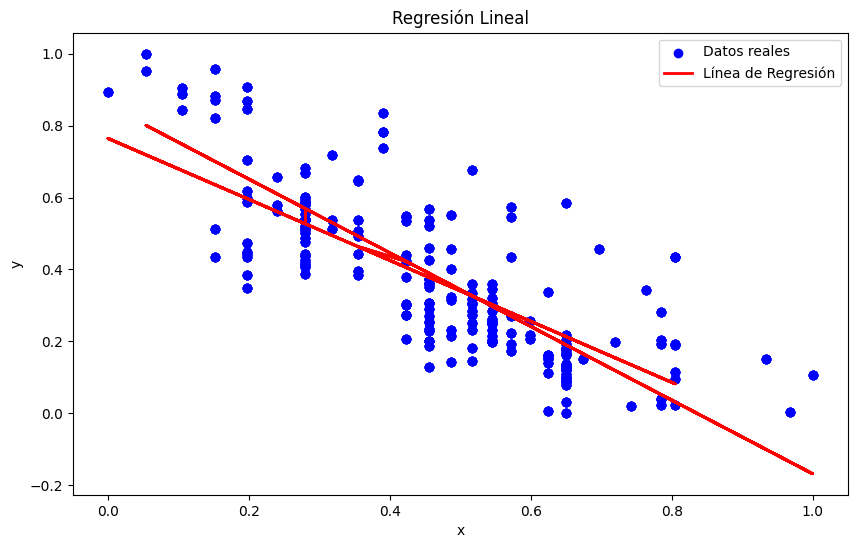

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = dfT2['city-mpg'].to_frame()
Y = dfT2['price'].to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## knn

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Mejor puntuación (MSE negativo): -0.01864935309235264
Mean R^2: 0.6398078808830601
Mean MSE: 0.01864935309235264
Mean RMSE: 0.13622653661454523


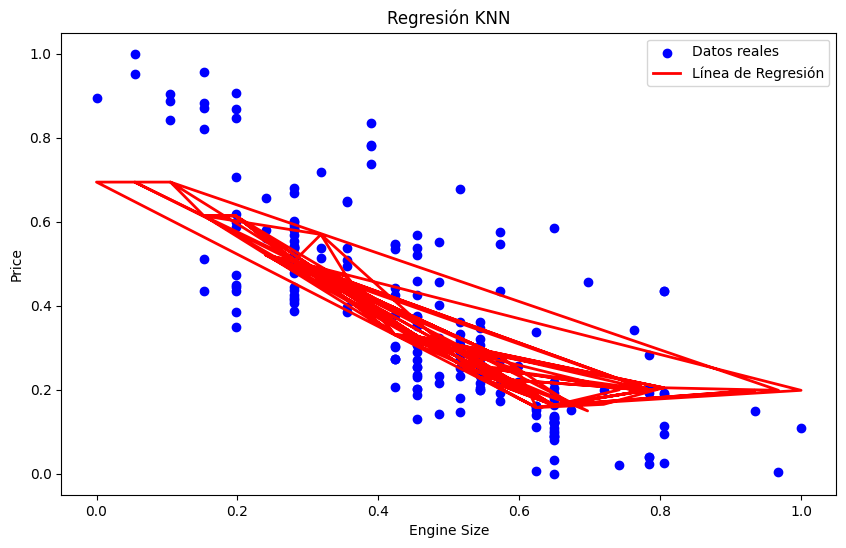

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y
X = dfT2['city-mpg'].to_frame()
Y = dfT2['price'].to_frame()

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, best_model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# highway-mpg


Correlation              highway-mpg     price
highway-mpg     1.000000 -0.690526
price          -0.690526  1.000000
Skew highway-mpg    0.539997
price          1.827324
dtype: float64


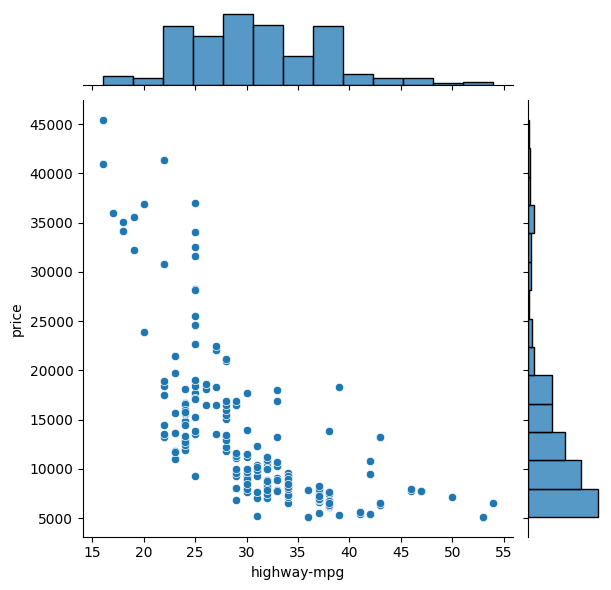

In [73]:
dfT6=pd.DataFrame({
    'highway-mpg':data['highway-mpg'],
    'price':data['price     ']
})
print("Correlation",dfT6.corr())
print("Skew",dfT6.skew())

sns.jointplot(x=dfT6['highway-mpg'],y=dfT6.price)

Correlation
              highway-mpg     price
highway-mpg     1.000000 -0.799401
price          -0.799401  1.000000
Skew highway-mpg   -0.099773
price          0.667808
dtype: float64


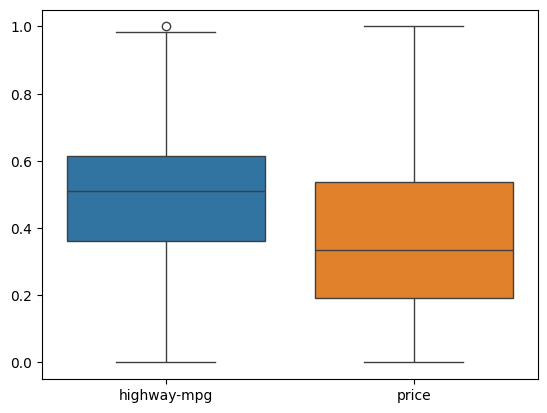

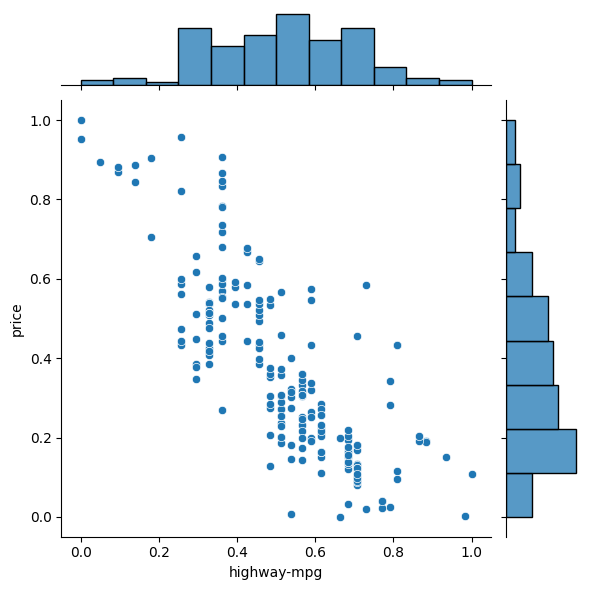

In [74]:
dfT6['highway-mpg']=np.log(dfT6['highway-mpg']+1)
dfT6['price']=np.log(dfT6['price']+1)

scaler=MinMaxScaler()
dfT6[['highway-mpg','price']] = scaler.fit_transform(dfT6[['highway-mpg','price']])
print("Correlation\n",dfT6.corr())
print("Skew",dfT6.skew())
sns.boxplot(dfT6)
sns.jointplot(x=dfT6['highway-mpg'],y=dfT6.price)

Mean R^2: 0.6026238063837296
MSE:  0.020296748345956392
RMSE:  0.020296748345956392
Slope: [[-0.87495083]]
Intercept: [0.81737655]


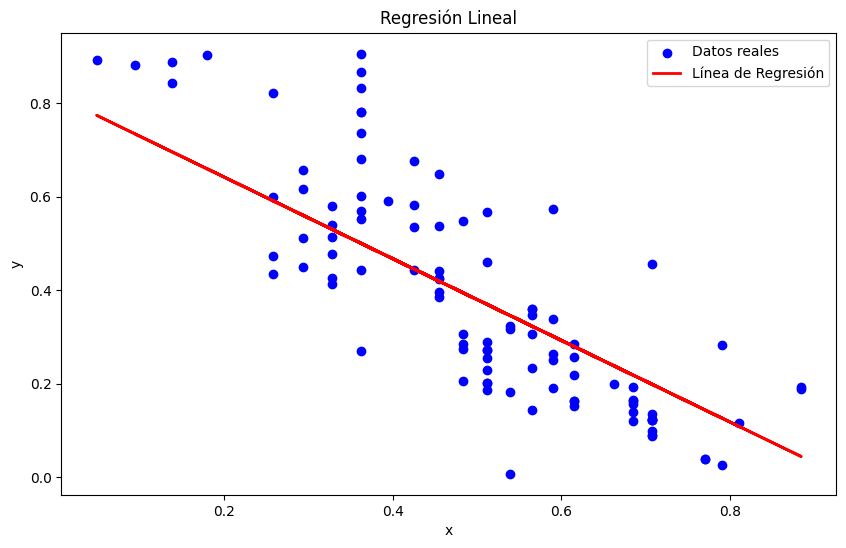

In [81]:
model2 = LinearRegression() 
mse_scores = []
rmse_scores = []
r2_scores = []
X=dfT6['highway-mpg'].to_frame()
Y=dfT6['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model2.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model2.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        rmse = mean_squared_error(y_test, y_pred)
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )
mean_rmse = np.mean(rmse_scores)
print("RMSE: ",mean_rmse )

print("Slope:", model2.coef_)
print("Intercept:", model2.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.6026238063837296
Mean MSE: 0.020296748345956395
Mean RMSE: 0.14246665691899474
Slope: -0.8749508264218194
Intercept: 0.8173765500913626
Intervalos de confianza del 95% para los parámetros:
                    0         1
const        0.740945  0.893808
highway-mpg -1.011579 -0.738323
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.16e-22
Time:                        10:43:48   Log-Likelihood:                 60.946
No. Observations:                 103   AIC:                            -117.9
Df Residuals:                     101   BIC:                            -112.6
Df Model:                           1                

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\1643555809.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\1643555809.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


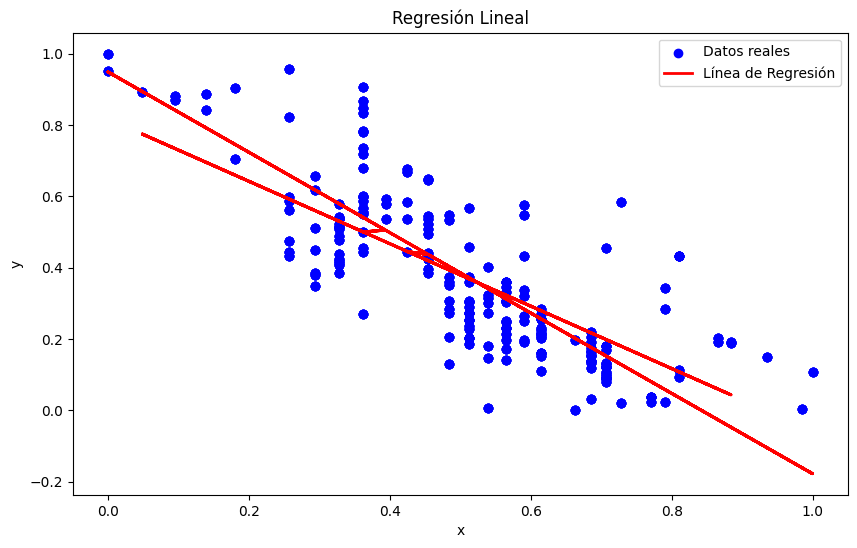

In [82]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = dfT6['highway-mpg'].to_frame()
Y = dfT6['price'].to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## kNN

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Mejor puntuación (MSE negativo): -0.01473467535564263
Mean R^2: 0.714051650378093
Mean MSE: 0.01473467535564263
Mean RMSE: 0.12126069885616314


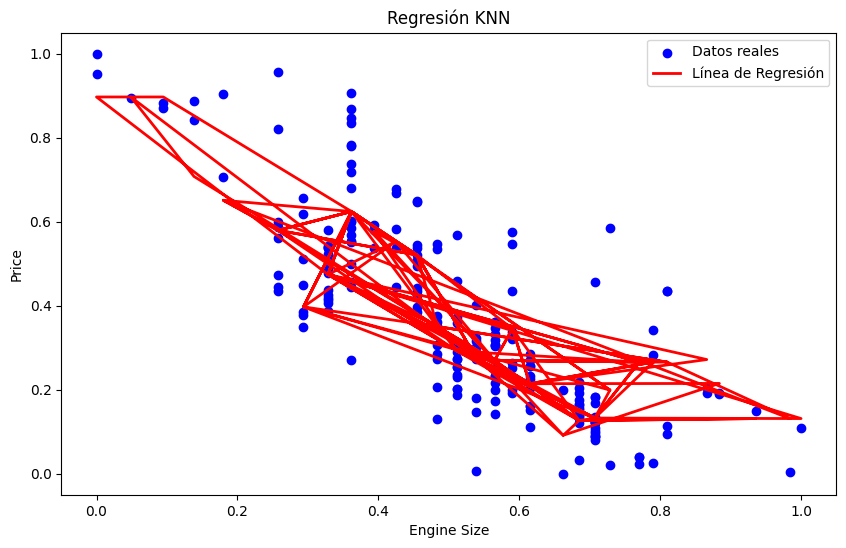

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y
X = dfT6['highway-mpg'].to_frame()
Y = dfT6['price'].to_frame()

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, best_model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# Crub weight

Correlation              curb-weight     price
curb-weight     1.000000  0.820825
price           0.820825  1.000000
Skew curb-weight    0.681398
price          1.827324
dtype: float64


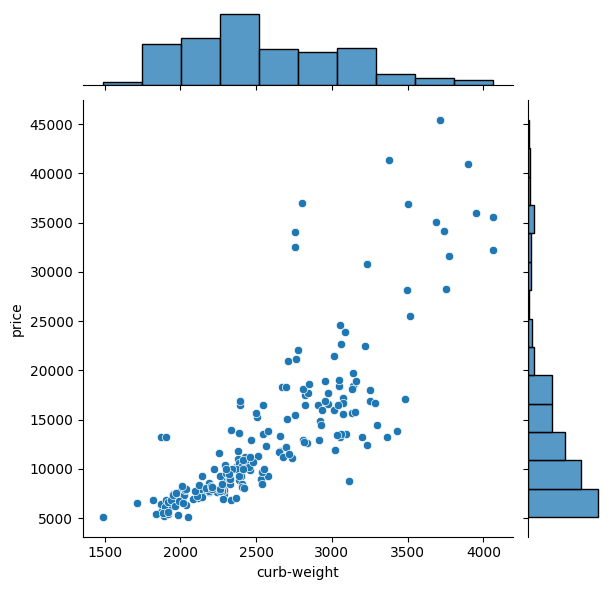

In [83]:
dfT3=pd.DataFrame({
    'curb-weight':data['curb-weight'],
    'price':data['price     ']
})
print("Correlation",dfT3.corr())
print("Skew",dfT3.skew())

sns.jointplot(x=dfT3['curb-weight'],y=dfT3.price)


Correlation
              curb-weight     price
curb-weight     1.000000  0.876229
price           0.876229  1.000000
Skew curb-weight    0.681398
price          0.667808
dtype: float64


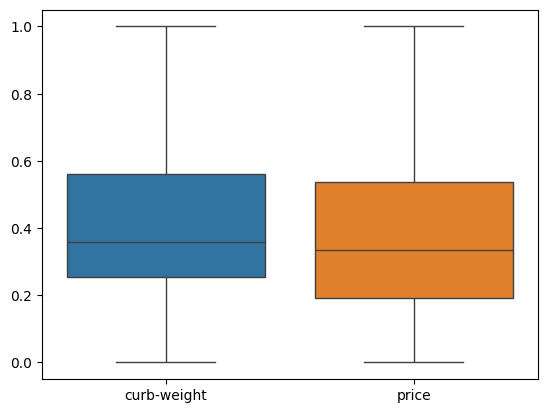

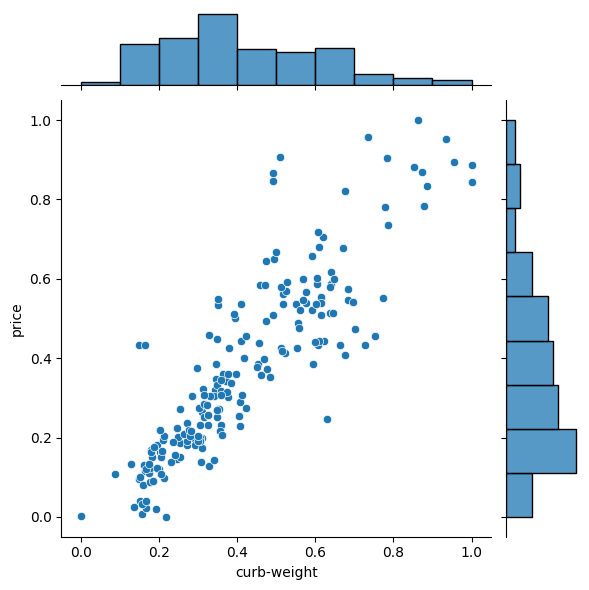

In [84]:

dfT3['price']=np.log(dfT3['price']+1)

scaler=MinMaxScaler()
dfT3[['curb-weight','price']] = scaler.fit_transform(dfT3[['curb-weight','price']])
print("Correlation\n",dfT3.corr())
print("Skew",dfT3.skew())
sns.boxplot(dfT3)
sns.jointplot(x=dfT3['curb-weight'],y=dfT3.price)

Mean R^2: 0.7595183149109518
MSE:  0.012140499045124736
Slope: [[0.95482217]]
Intercept: [-0.02616991]


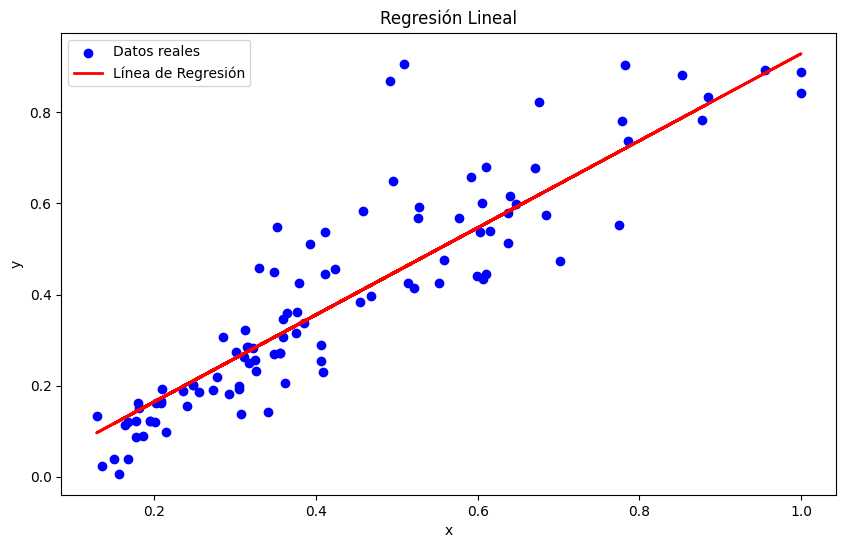

In [85]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=dfT3['curb-weight'].to_frame()
Y=dfT3['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.7476173491077281
MSE:  0.06046404724209488
Slope: [[2.04396388]]
Intercept: [-6.65330953]


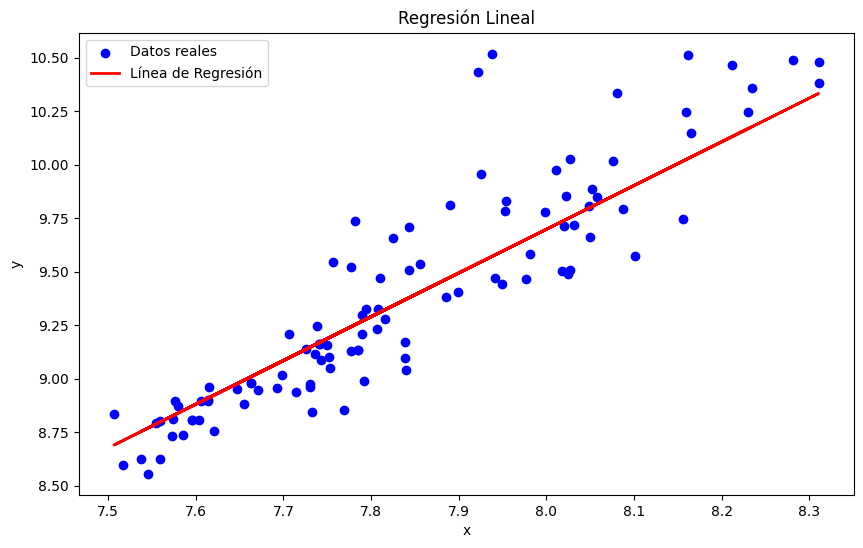

In [86]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=np.log(data['curb-weight']+1).to_frame()
Y=np.log(data['price     ']+1).to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.7595183149109519
Mean MSE: 0.012140499045124733
Mean RMSE: 0.10997951973411302
Slope: 0.9548221722260348
Intercept: -0.026169913379903483
Intervalos de confianza del 95% para los parámetros:
                    0         1
const       -0.079677  0.027337
curb-weight  0.834667  1.074978
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     248.5
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           5.56e-29
Time:                        10:45:18   Log-Likelihood:                 75.711
No. Observations:                 103   AIC:                            -147.4
Df Residuals:                     101   BIC:                            -142.2
Df Model:                           1              

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\3249765344.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\3249765344.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


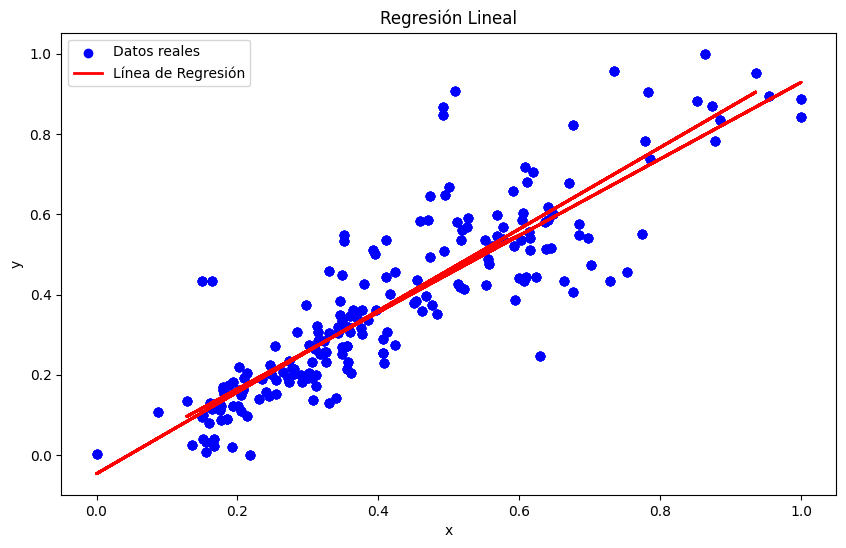

In [87]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = dfT3['curb-weight'].to_frame()
Y = dfT3['price'].to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## KNN 

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Mejor puntuación (MSE negativo): -0.012413594738192302
Mean R^2: 0.7537829642479748
Mean MSE: 0.012413594738192302
Mean RMSE: 0.11115941370057997


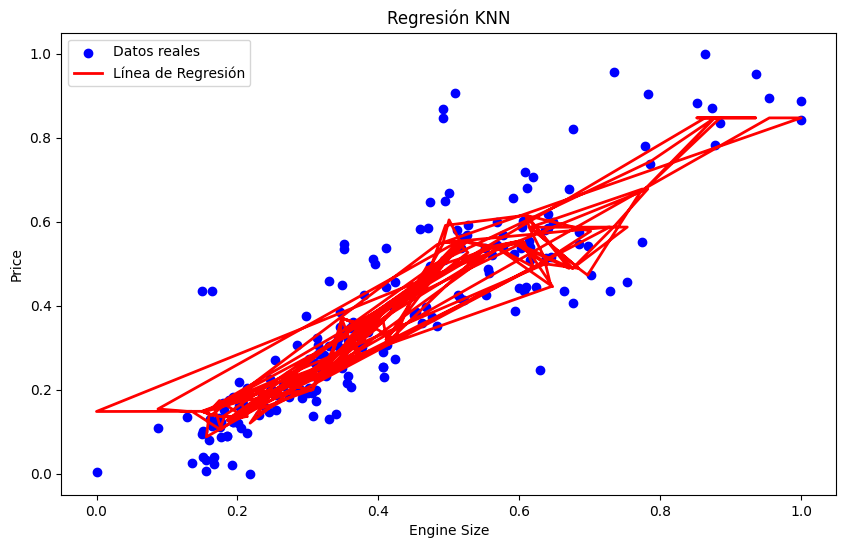

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y
X = dfT3['curb-weight'].to_frame()
Y = dfT3['price'].to_frame()

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, best_model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# Horse power

Correlation             HorsePower     price
HorsePower    1.000000  0.758769
price         0.758769  1.000000
Skew HorsePower    1.403441
price         1.827324
dtype: float64


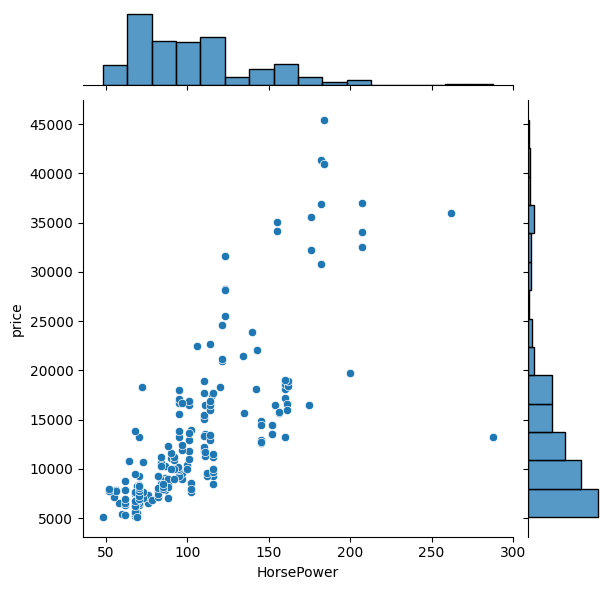

In [88]:
dfT4=pd.DataFrame({
    'HorsePower':data['horsepower'],
    'price':data['price     ']
})
print("Correlation",dfT4.corr())
print("Skew",dfT4.skew())

sns.jointplot(x=dfT4['HorsePower'],y=dfT4.price)


Correlation
             HorsePower     price
HorsePower    1.000000  0.814306
price         0.814306  1.000000
Skew HorsePower    0.485820
price         0.667808
dtype: float64


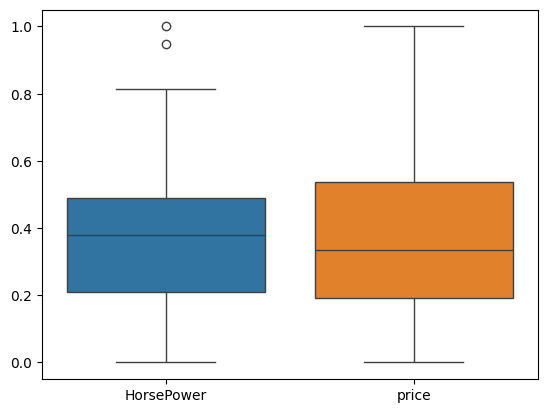

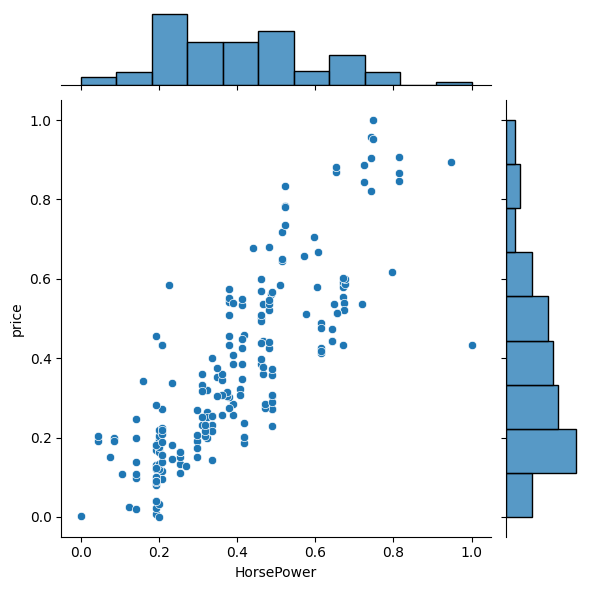

In [90]:
dfT4['price']=np.log(dfT4['price']+1)

dfT4['HorsePower']=np.log(dfT4['HorsePower']+1)
scaler=MinMaxScaler()
dfT4[['HorsePower','price']] = scaler.fit_transform(dfT4[['HorsePower','price']])
print("Correlation\n",dfT4.corr())
print("Skew",dfT4.skew())
sns.boxplot(dfT4)
sns.jointplot(x=dfT4['HorsePower'],y=dfT4.price)

Mean R^2: 0.643410145660548
MSE:  0.018231972174382653
Slope: [[0.88501306]]
Intercept: [0.02235048]


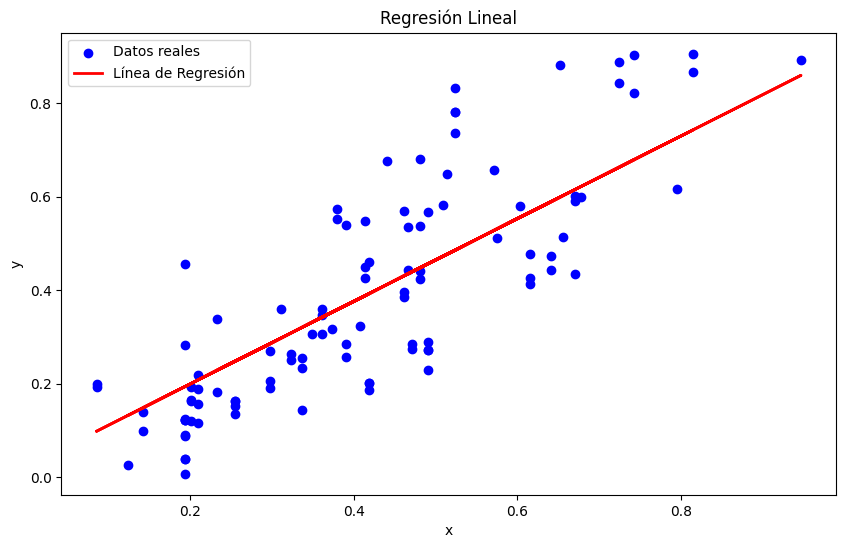

In [91]:
model = LinearRegression() 
mse_scores = []
r2_scores = []

X=dfT4['HorsePower'].to_frame()
Y=dfT4['price'].to_frame()
y_pred=[]
X_test=[]
y_test=[]
# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Entrenamos el modelo
        model.fit(X_train, y_train)
        
        # Realizamos las predicciones
        y_pred = model.predict(X_test)
        
        # Calculamos el MSE y lo almacenamos
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        

# Calculamos el promedio de MSE
mean_r2 = np.mean(r2_scores)
print("Mean R^2:", mean_r2)
mean_mse = np.mean(mse_scores)
print("MSE: ",mean_mse )

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Mean R^2: 0.643410145660548
Mean MSE: 0.018231972174382657
Mean RMSE: 0.1350239468208517
Slope: 0.8850130631724356
Intercept: 0.022350476028700144
Intervalos de confianza del 95% para los parámetros:
                   0         1
const      -0.033891  0.078592
HorsePower  0.753111  1.016915
Datos del modelo:                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           5.97e-24
Time:                        10:46:11   Log-Likelihood:                 63.953
No. Observations:                 103   AIC:                            -123.9
Df Residuals:                     101   BIC:                            -118.6
Df Model:                           1                    

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\232201716.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\232201716.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


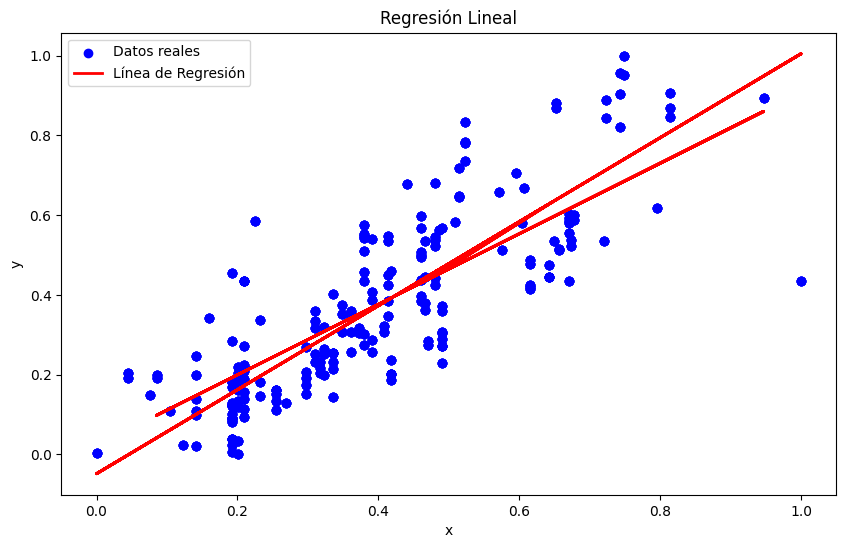

In [92]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
X = dfT4['HorsePower'].to_frame()
Y = dfT4['price'].to_frame()

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Knn

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Mejor puntuación (MSE negativo): -0.012141600878739993
Mean R^2: 0.7603392244337541
Mean MSE: 0.012141600878739993
Mean RMSE: 0.11008958256719932


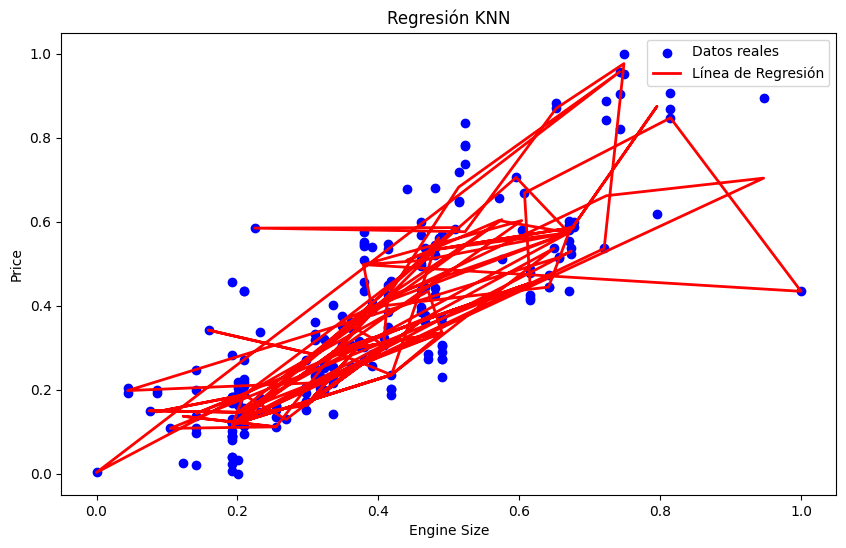

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y
X = dfT4['HorsePower'].to_frame()
Y = dfT4['price'].to_frame()

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, best_model.predict(X), color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

             make    price     
7          jaguar  34600.000000
9   mercedes-benz  33647.000000
15        porsche  27761.825871
2             bmw  26118.750000
21          volvo  18063.181818
1            audi  17194.589908
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
6           isuzu  11061.814677
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\398361553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='price     ', data=grouped_by_brand, palette='viridis')


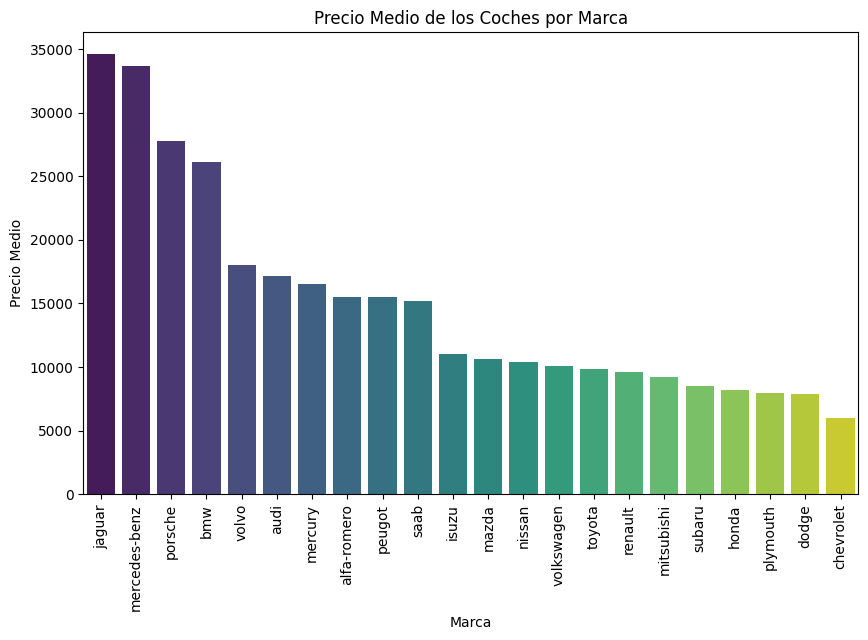

In [94]:
brand_count=data['make'].unique()
grouped_by_brand=data.groupby('make')['price     '].mean().reset_index()
grouped_by_brand=grouped_by_brand.sort_values(by='price     ',ascending=False)
print(grouped_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='price     ', data=grouped_by_brand, palette='viridis')
plt.xlabel('Marca')
plt.ylabel('Precio Medio')
plt.title('Precio Medio de los Coches por Marca')
plt.xticks(rotation=90)  # Rotar los nombres de las marcas si son muchos
plt.show()


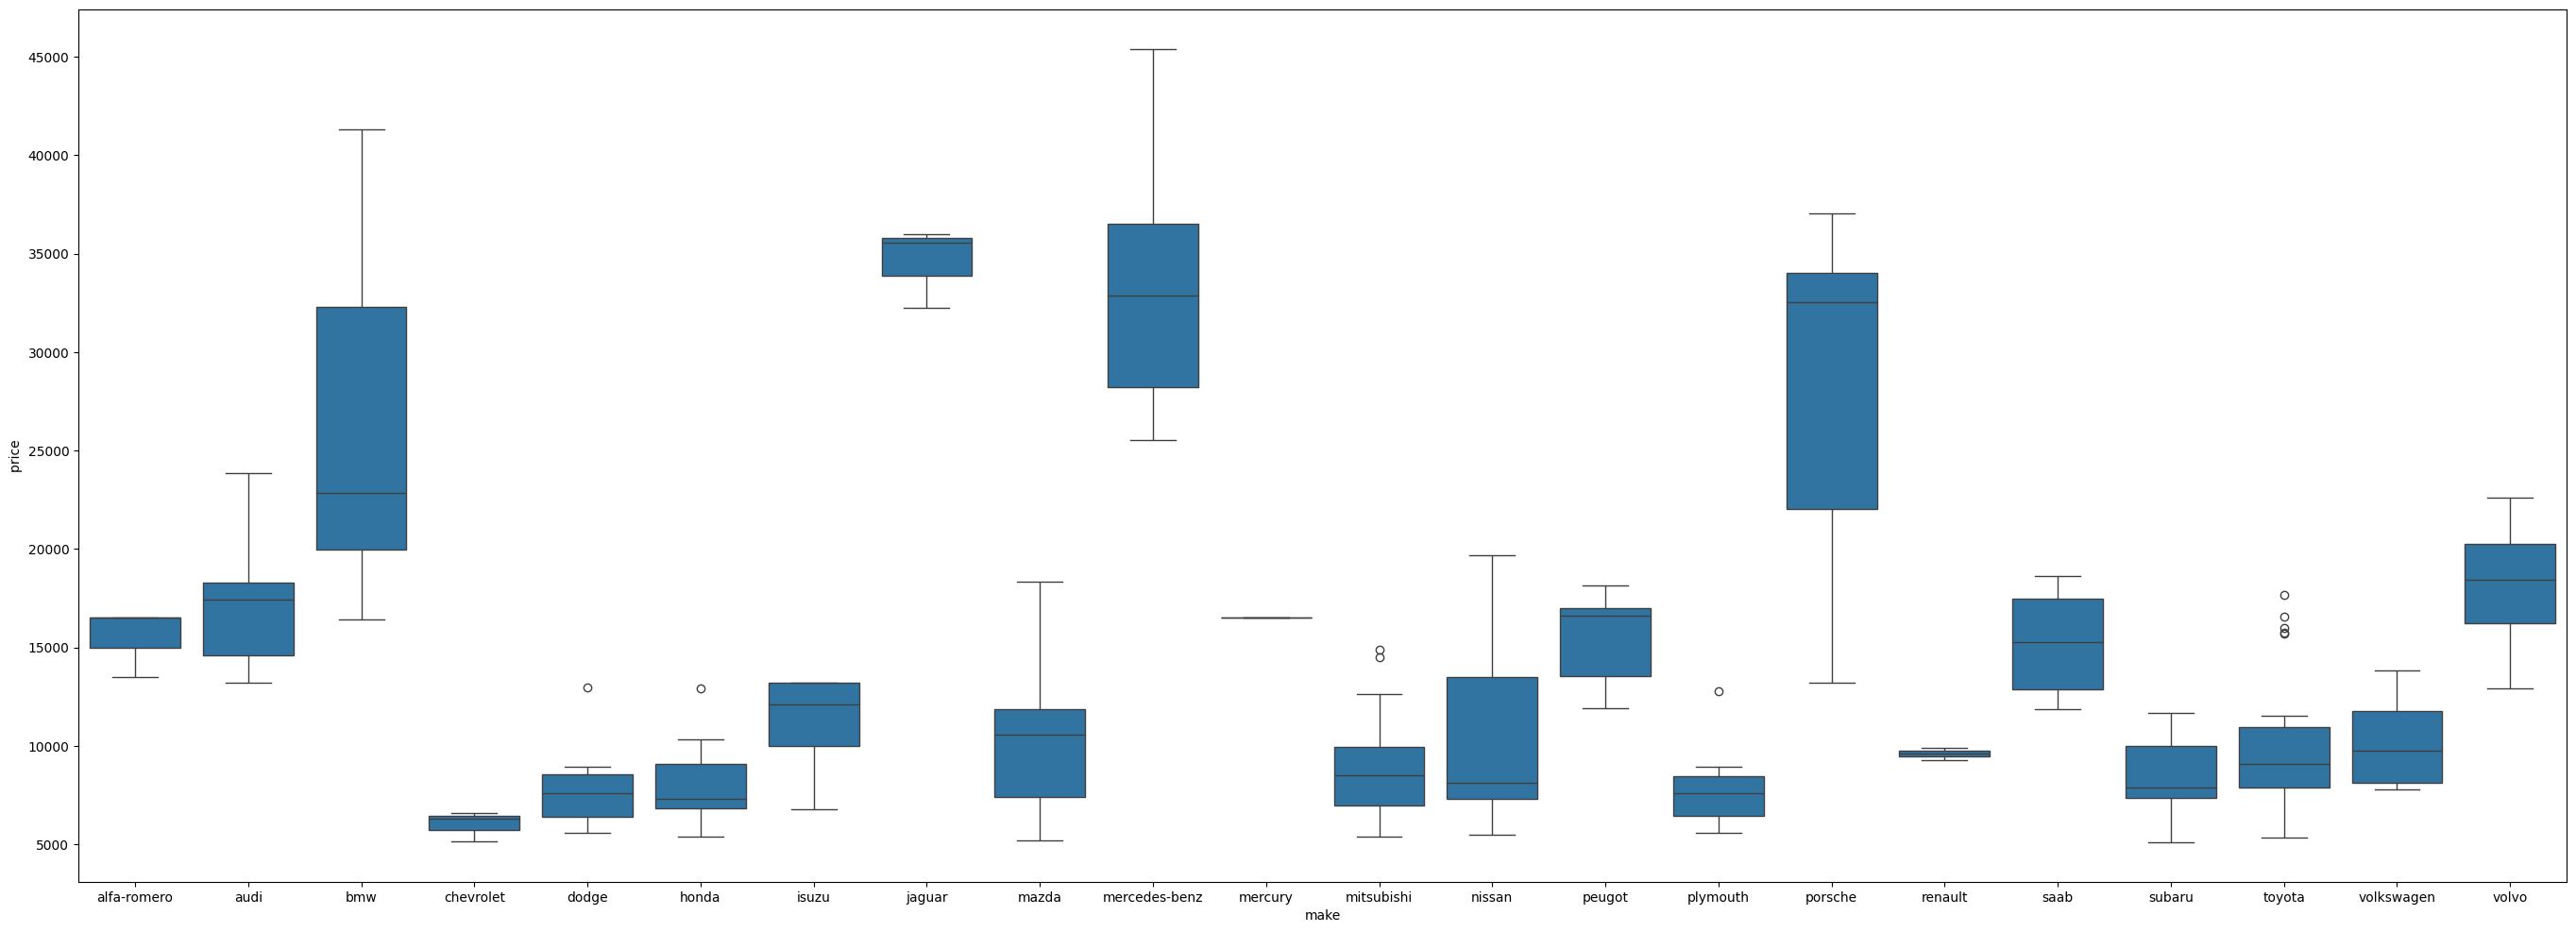

In [95]:
plt.figure(figsize=(34,12))
sns.boxplot(x='make', y='price     ', data=data)
plt.show()

             make    price     
7          jaguar  34600.000000
9   mercedes-benz  33647.000000
15        porsche  27761.825871
2             bmw  26118.750000
21          volvo  18063.181818
1            audi  17194.589908
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
6           isuzu  11061.814677
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\3642560451.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='engine-size', data=grouped_by_brand2, palette='viridis')


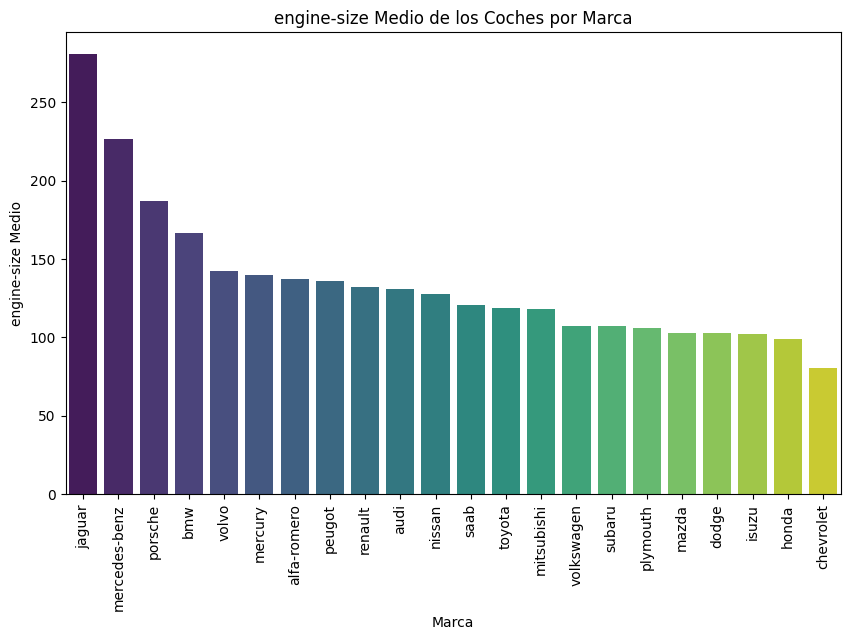

In [96]:
dfT5=pd.DataFrame({
    'engine-size':data['engine-size'],
    'make':data['make']
})
brand_count2=dfT5['make'].unique()
grouped_by_brand2=dfT5.groupby('make')['engine-size'].mean().reset_index()
grouped_by_brand2=grouped_by_brand2.sort_values(by='engine-size',ascending=False)
print(grouped_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='engine-size', data=grouped_by_brand2, palette='viridis')
plt.xlabel('Marca')
plt.ylabel('engine-size Medio')
plt.title('engine-size Medio de los Coches por Marca')
plt.xticks(rotation=90)  # Rotar los nombres de las marcas si son muchos
plt.show()


             make    price     
7          jaguar  34600.000000
9   mercedes-benz  33647.000000
15        porsche  27761.825871
2             bmw  26118.750000
21          volvo  18063.181818
1            audi  17194.589908
10        mercury  16503.000000
0     alfa-romero  15498.333333
13         peugot  15489.090909
17           saab  15223.333333
6           isuzu  11061.814677
8           mazda  10652.882353
12         nissan  10415.666667
20     volkswagen  10077.500000
19         toyota   9885.812500
16        renault   9595.000000
11     mitsubishi   9239.769231
18         subaru   8541.250000
5           honda   8184.692308
14       plymouth   7963.428571
4           dodge   7875.444444
3       chevrolet   6007.000000


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\2379143192.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='curb-weight', data=grouped_by_brand2, palette='viridis')


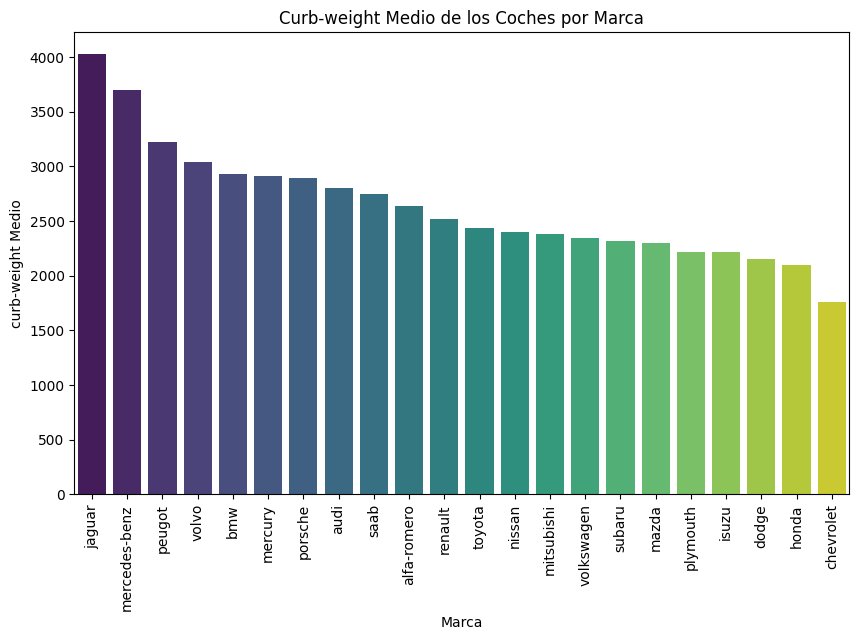

In [97]:
dfT7=pd.DataFrame({
    'curb-weight':data['curb-weight'],
    'make':data['make']
})
brand_count2=dfT7['make'].unique()
grouped_by_brand2=dfT7.groupby('make')['curb-weight'].mean().reset_index()
grouped_by_brand2=grouped_by_brand2.sort_values(by='curb-weight',ascending=False)
print(grouped_by_brand)
plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='curb-weight', data=grouped_by_brand2, palette='viridis')
plt.xlabel('Marca')
plt.ylabel('curb-weight Medio')
plt.title('Curb-weight Medio de los Coches por Marca')
plt.xticks(rotation=90)  # Rotar los nombres de las marcas si son muchos
plt.show()

# Categorical and continuty variables association

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
dfT9=pd.DataFrame({
    'make':data['make'],
    'price':data['price     '],
    'fuelType':data['fuel-type'],
    'aspiration':data['aspiration'],
    'numofdoors':data['num-of-doors'],
    'body':data['body-style'],
    'drive':data['drive-wheels'],
    'engineloc':data['engine-location'],
    'type':data['engine-type'],
    'cylinders':data['num-of-cylinders'],
    'system':data['fuel-system']
})
# Ejemplo con una variable categórica 'fuel-type' y una continua 'price'
model = ols('price~ C(make)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F        PR(>F)
C(make)   9.750960e+09   21.0  29.502216  1.019818e-47
Residual  2.880213e+09  183.0        NaN           NaN


In [99]:
model = ols('price~ C(fuelType)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq     df         F    PR(>F)
C(fuelType)  1.534125e+08    1.0  2.495859  0.115703
Residual     1.247776e+10  203.0       NaN       NaN


In [100]:
model = ols('price~ C(aspiration)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df        F    PR(>F)
C(aspiration)  3.969954e+08    1.0  6.58729  0.010991
Residual       1.223418e+10  203.0      NaN       NaN


In [101]:
model = ols('price~ C(numofdoors)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df         F    PR(>F)
C(numofdoors)  2.672851e+07    1.0  0.427171  0.514127
Residual       1.257677e+10  201.0       NaN       NaN


In [102]:
model = ols('price~ C(body)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F        PR(>F)
C(body)   1.960055e+09    4.0  9.183927  7.844576e-07
Residual  1.067112e+10  200.0       NaN           NaN


In [103]:
model = ols('price~ C(drive)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F        PR(>F)
C(drive)  5.060130e+09    2.0  67.503667  3.539271e-23
Residual  7.571043e+09  202.0        NaN           NaN


In [104]:
model = ols('price~ C(engineloc)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df          F    PR(>F)
C(engineloc)  1.383992e+09    1.0  24.979629  0.000001
Residual      1.124718e+10  203.0        NaN       NaN


In [105]:
model = ols('price~ C(type)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F        PR(>F)
C(type)   2.538008e+09    6.0  8.298116  5.008078e-08
Residual  1.009316e+10  198.0       NaN           NaN


In [106]:
model = ols('price~ C(cylinders)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df          F        PR(>F)
C(cylinders)  7.336567e+09    6.0  45.727054  7.149270e-35
Residual      5.294606e+09  198.0        NaN           NaN


In [107]:
model = ols('price~ C(system)', data=dfT9).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df          F        PR(>F)
C(system)  4.352758e+09    7.0  14.797402  1.865735e-15
Residual   8.278415e+09  197.0        NaN           NaN


MSE: 0.08221699892102004
R²: 0.6907940114232951
Slope (Coeficients): [ 0.18958328  0.50766223 -1.26198477 -0.99000114 -0.92894517 -0.6305545
  1.16321074 -0.68259389  1.23056047  0.09693613 -0.91120827 -0.65395334
 -0.00913223 -0.95232464  0.75358479 -0.68607991  0.0266443  -0.99147226
 -0.65961111 -0.6527091   0.27815024]
Intercept: 9.644167050817138


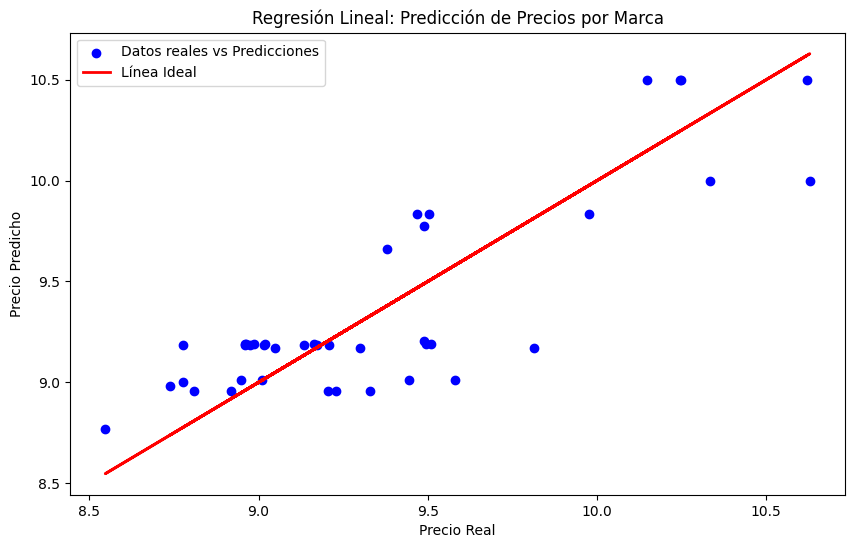

In [108]:
import pandas as pd
dfT10=pd.DataFrame({
     'make':data['make'],
     'price':data['price     ']
})

# Suponiendo que ya tienes un DataFrame df con 'make' y 'price'


# Aplicar One-Hot Encoding
df = pd.get_dummies(dfT10, columns=['make'], drop_first=True)
from sklearn.model_selection import train_test_split

X = np.log(df.drop('price', axis='columns')+1)
y = np.log(df['price']+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print("Slope (Coeficients):", model.coef_)
print("Intercept:", model.intercept_)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos reales vs Predicciones')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Lineal: Predicción de Precios por Marca')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()

Mean R^2: 0.5527870707429572
Mean MSE: 27470130.49726521
Mean RMSE: 5233.326961250422
Slope: 3424.597353310227
Intercept: 16499.999999999945
Intervalos de confianza del 95% para los parámetros:
                               0             1
const               8.505088e+03  2.449491e+04
make_audi          -9.471053e+03  1.632025e+04
make_bmw            5.502671e+02  2.634157e+04
make_chevrolet     -2.967440e+04 -1.421447e+03
make_dodge         -2.632245e+04 -5.311514e+02
make_honda         -2.544782e+04  3.434824e+02
make_isuzu         -2.074129e+04  5.050008e+03
make_jaguar        -2.897849e-11  4.666127e-11
make_mazda         -2.137294e+04  2.721257e+03
make_mercedes-benz  2.084637e+04  4.748351e+04
make_mercury       -1.630752e+04  1.631618e+04
make_mitsubishi    -2.284808e+04  2.943219e+03
make_nissan        -2.116841e+04  3.147864e+03
make_peugot        -1.540663e+04  9.254569e+03
make_plymouth      -2.303560e+04  3.601539e+03
make_porsche       -4.540671e+03  2.209647e+04
make_re

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\3702773306.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Slope:", results.params[1])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18740\3702773306.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", results.params[0])


ValueError: x and y must be the same size

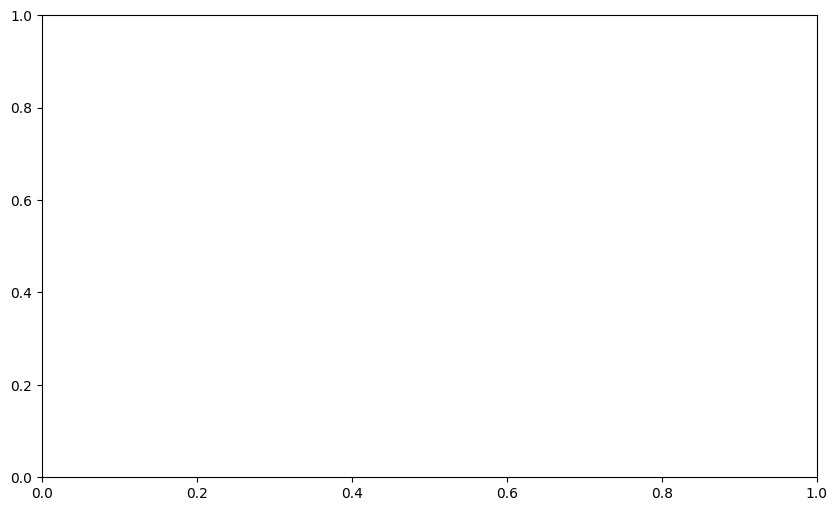

In [111]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)

X = np.log(df.drop('price', axis='columns')+1)
y = np.log(df['price']+1)

mse_scores = []
rmse_scores = []
r2_scores = []
y_pred_all = []
X_test_all = []
y_test_all = []

# 5x2 Cross-Validation
for _ in range(5):
    kf = KFold(n_splits=2, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Agregar una columna de unos para el intercepto
        X_train_sm = sm.add_constant(X_train)
        X_test_sm = sm.add_constant(X_test)

        # Ajustar el modelo de regresión lineal con statsmodels
        model = sm.OLS(y_train, X_train_sm)
        results = model.fit()

        # Realizar las predicciones
        y_pred = results.predict(X_test_sm)
        
        # Almacenar predicciones y datos de prueba
        y_pred_all.extend(y_pred)
        X_test_all.extend(X_test.values.flatten())
        y_test_all.extend(y_test.values.flatten())
        
        # Calcular métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Promedio de las métricas
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Resultados del modelo
print("Slope:", results.params[1])
print("Intercept:", results.params[0])

# Intervalos de confianza
conf_int = results.conf_int(alpha=0.05)  # alpha=0.05 para un intervalo de confianza del 95%
print("Intervalos de confianza del 95% para los parámetros:")
print(conf_int)

# Resultados del modelo
print("Datos del modelo:", results.summary())

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_test_all, y_test_all, color='blue', label='Datos reales')
plt.plot(X_test_all, y_pred_all, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Fitting 2 folds for each of 64 candidates, totalling 128 fits
Mejores parámetros encontrados: {'metric': 'chebyshev', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Mejor puntuación (MSE negativo): -0.13686099980559793
Mean R^2: 0.43319290242601016
Mean MSE: 0.13686099980559793
Mean RMSE: 0.3696553507791872


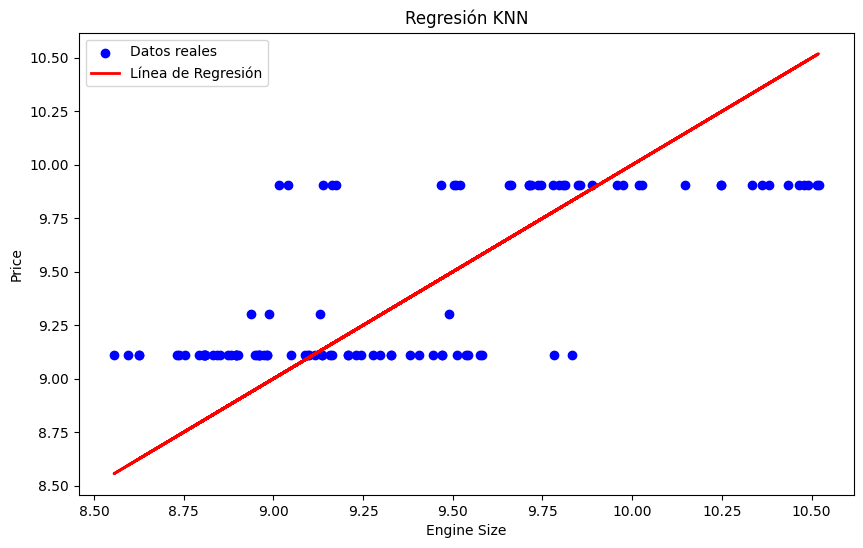

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definir el modelo KNN
model = KNeighborsRegressor()

# Definir los parámetros para ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],  # Cómo se ponderan los vecinos
    'p': [1, 2],  # Parámetro para la métrica de distancia (1 para Manhattan, 2 para Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=KFold(n_splits=2, shuffle=True, random_state=0),
    scoring='neg_mean_squared_error',  # Usar MSE negativo porque GridSearchCV busca maximizar la puntuación
    verbose=1
)

# Definir X y Y

X = np.log(df.drop('price', axis='columns')+1)
y = np.log(df['price']+1)

# Ajustar GridSearchCV
grid_search.fit(X, Y)

# Resultados del Grid Search
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluación del mejor modelo
best_model = grid_search.best_estimator_

# Validación cruzada con el mejor modelo
mse_scores = []
rmse_scores = []
r2_scores = []

kf = KFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    rmse = np.sqrt(mse)  # Calcula RMSE a partir de MSE
    rmse_scores.append(rmse)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)

print("Mean R^2:", mean_r2)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos reales')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión KNN')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

MSE: 0.1626071150057961
R²: 0.388458659342788
Slope (Coeficients): [-5.29740893e-01 -1.57444712e+00 -4.21658829e-01  3.33066907e-16
  3.06232932e-01 -1.09558006e+00]
Intercept: 10.279037501721529


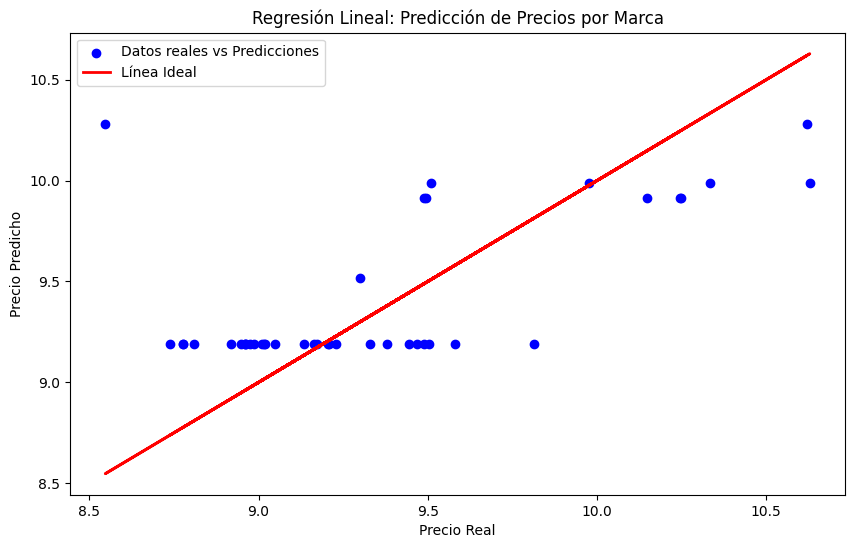

"\n\n'fuelType':data['fuel-type'],\n    'aspiration':data['aspiration'],\n    'numofdoors':data['num-of-doors'],\n    'body':data['body-style'],\n    'drive':data['drive-wheels'],\n    'engineloc':data['engine-location'],\n    'type':data['engine-type'],\n    'cylinders':data['num-of-cylinders'],\n    'system':data['fuel-system']\n"

In [ ]:
dfT11=pd.DataFrame({
'cylinders':data['num-of-cylinders'],
     'price':data['price     ']
})

# Aplicar One-Hot Encoding
df = pd.get_dummies(dfT11, columns=['cylinders'], drop_first=True)
from sklearn.model_selection import train_test_split

X = np.log(df.drop('price', axis='columns')+1)
y = np.log(df['price']+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print("Slope (Coeficients):", model.coef_)
print("Intercept:", model.intercept_)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos reales vs Predicciones')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Lineal: Predicción de Precios por Marca')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()
"""

'fuelType':data['fuel-type'],
    'aspiration':data['aspiration'],
    'numofdoors':data['num-of-doors'],
    'body':data['body-style'],
    'drive':data['drive-wheels'],
    'engineloc':data['engine-location'],
    'type':data['engine-type'],
    'cylinders':data['num-of-cylinders'],
    'system':data['fuel-system']
"""

MSE: 0.13885984731882725
R²: 0.47776862537789655
Slope (Coeficients): [-0.18618255  0.80874436]
Intercept: 9.211701549065785


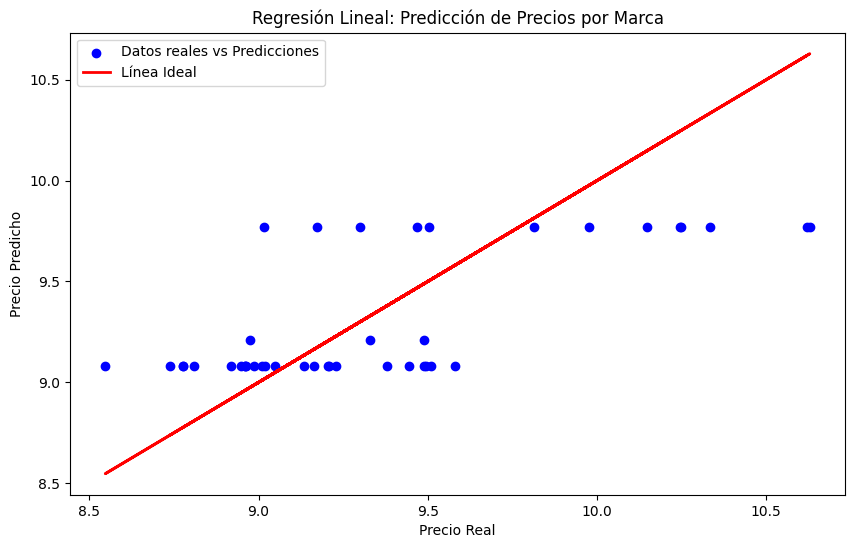

In [ ]:
dfT12=pd.DataFrame({
'drive':data['drive-wheels'],
     'price':data['price     ']
})

# Aplicar One-Hot Encoding
df = pd.get_dummies(dfT12, columns=['drive'], drop_first=True)
from sklearn.model_selection import train_test_split

X = np.log(df.drop('price', axis='columns')+1)
y = np.log(df['price']+1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print("Slope (Coeficients):", model.coef_)
print("Intercept:", model.intercept_)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Datos reales vs Predicciones')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Línea Ideal')
plt.title('Regresión Lineal: Predicción de Precios por Marca')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()
